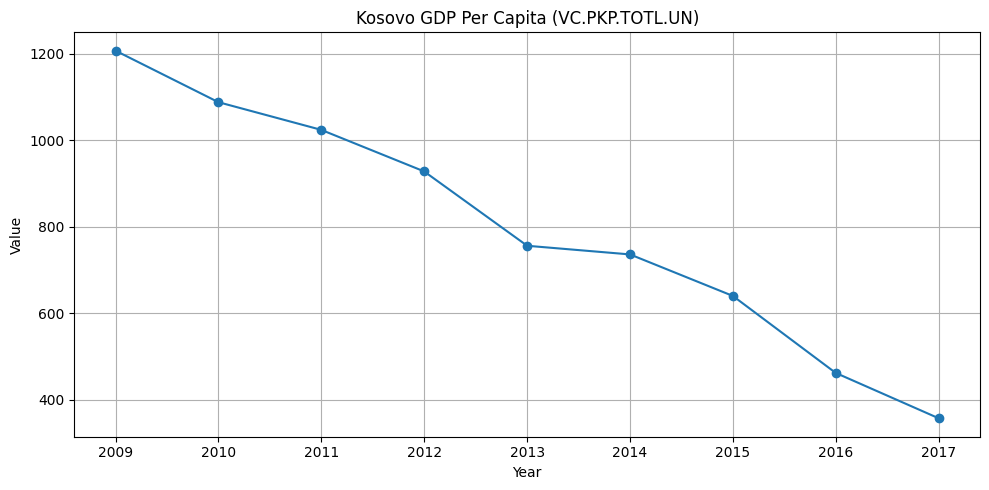

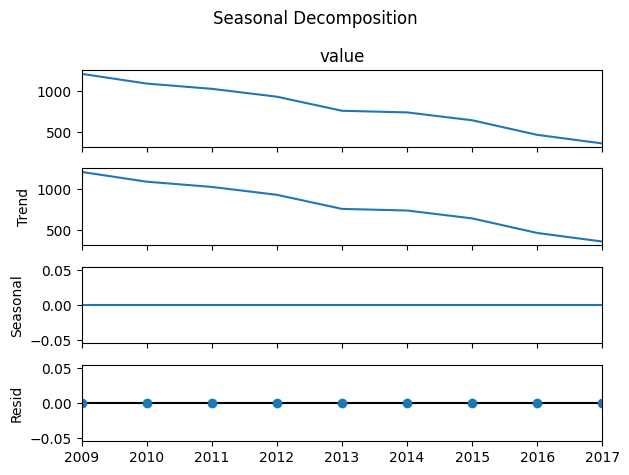

ADF Statistic: 0.6443988374394504
p-value: 0.9886603631235329
Critical Values: {'1%': np.float64(-5.354256481481482), '5%': np.float64(-3.6462381481481483), '10%': np.float64(-2.901197777777778)}

After First Differencing:
ADF Statistic: -164.56453115380947
p-value: 0.0
Critical Values: {'1%': np.float64(-6.045114), '5%': np.float64(-3.9292800000000003), '10%': np.float64(-2.98681)}


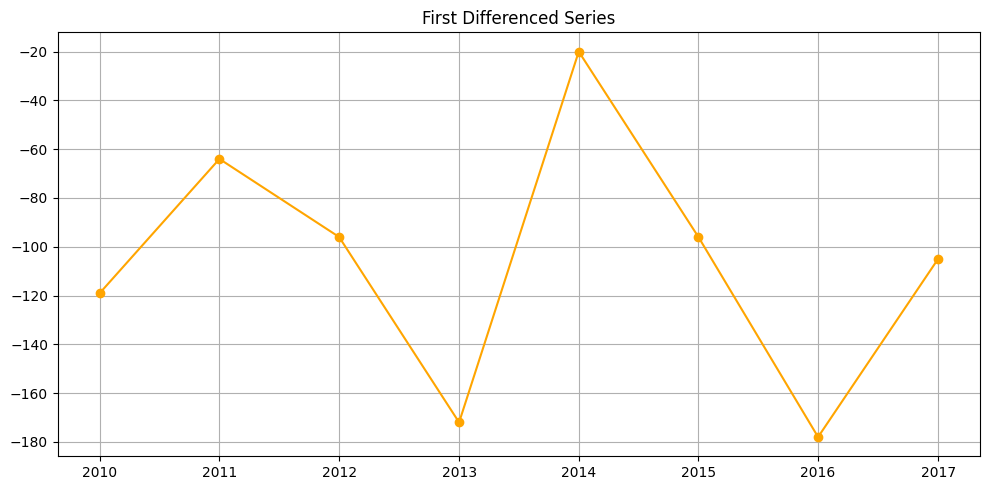

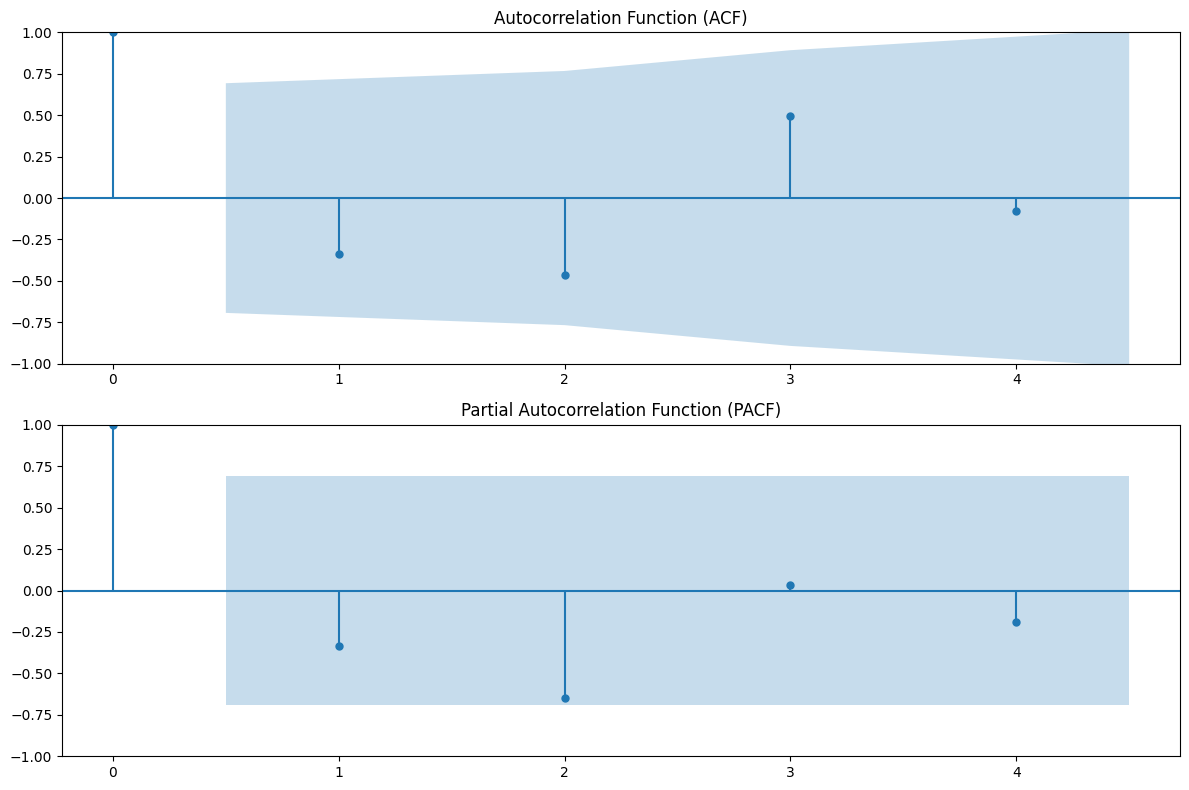

In [28]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 2: Loaded CSV data
df = pd.read_csv('/content/sample_data/WB_DATA.csv')

# Step 3: Filter the dataset for Kosovo and the GDP per capita indicator
df_kosovo = df[(df['series_id'] == 'VC.PKP.TOTL.UN') & (df['country_code'] == 'XKX')].copy()

# Step 4: Cleaned and prepared the time-series data
df_kosovo = df_kosovo[['year', 'value']].dropna()
df_kosovo['year'] = pd.to_datetime(df_kosovo['year'], format='%Y')
df_kosovo.set_index('year', inplace=True)
df_kosovo.sort_index(inplace=True)

# Step 5: Plot the raw time series
plt.figure(figsize=(10, 5))
plt.plot(df_kosovo['value'], marker='o')
plt.title('Kosovo GDP Per Capita (VC.PKP.TOTL.UN)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Decompose the series to visualize components (trend, seasonality, residual)
decomposition = seasonal_decompose(df_kosovo['value'], model='additive', period=1)
decomposition.plot()
plt.suptitle('Seasonal Decomposition')
plt.tight_layout()
plt.show()

# Step 7: Perform Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(df_kosovo['value'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Step 8: First differencing if the series is not stationary
if adf_result[1] > 0.05:
    df_diff = df_kosovo.diff().dropna()
    adf_result_diff = adfuller(df_diff['value'])
    print("\nAfter First Differencing:")
    print("ADF Statistic:", adf_result_diff[0])
    print("p-value:", adf_result_diff[1])
    print("Critical Values:", adf_result_diff[4])

    # Plot the first differenced series
    plt.figure(figsize=(10, 5))
    plt.plot(df_diff['value'], marker='o', color='orange')
    plt.title('First Differenced Series')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 9: Second differencing if still not stationary
    if adf_result_diff[1] > 0.05:
        df_diff2 = df_diff.diff().dropna()
        adf_result_diff2 = adfuller(df_diff2['value'])
        print("\nAfter Second Differencing:")
        print("ADF Statistic:", adf_result_diff2[0])
        print("p-value:", adf_result_diff2[1])
        print("Critical Values:", adf_result_diff2[4])

        # Plot the second differenced series
        plt.figure(figsize=(10, 5))
        plt.plot(df_diff2['value'], marker='o', color='red')
        plt.title('Second Differenced Series')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        acf_data = df_diff2
    else:
        acf_data = df_diff
else:
    print("\nSeries is already stationary.")
    acf_data = df_kosovo

# Step 10: Plot Autocorrelation and Partial Autocorrelation Functions
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(acf_data['value'], ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(acf_data['value'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


## Time-Series Analysis: Kosovo GDP Per Capita (2009–2017)

In this exercise, I did a time-series analysis of Kosovo’s **GDP per capita** using official World Bank data accessed via the Nasdaq Data Link API. This adds a **macroeconomic perspective** to our broader project on university rankings by examining how economic trends might influence educational investments, research capacity, and institutional performance in countries like Kosovo.

### Dataset Information

- **Source**: [World Bank – Nasdaq Data Link](https://data.nasdaq.com/)
- **API Table**: `WB/DATA`
- **Series ID**: `VC.PKP.TOTL.UN` (GDP per capita, current USD)
- **Country Code**: `XKX` (Kosovo)
- **Columns**: `series_id`, `country_code`, `country_name`, `year`, `value`
- **Years Covered**: **2009–2017**


This subset was extracted from a larger dataset of over **9 million rows**, which includes global indicators across countries and years.


### Objective

To examine Kosovo’s economic trend over time and assess its stationarity using standard time-series techniques. This helps evaluate whether macroeconomic factors like GDP trends correlate with a country's higher education development, as seen in global university ranking scores.

### Key Insights from the Analysis

#### 1. **Raw Time-Series Plot**
- The line chart showed a **decline in GDP per capita** from 2009 to 2017.
- This suggests economic stagnation or external shocks during this period, potentially limiting investments in tertiary education and university infrastructure.

#### 2. **Seasonal Decomposition**
- Decomposition primarily highlighted a **clear downward trend**.
- No strong seasonal effects were observed due to the annual nature and limited time range of the data.

#### 3. **Stationarity Test (ADF)**
- The **Augmented Dickey-Fuller test** on the original series yielded a **p-value > 0.05**, indicating **non-stationarity**.
- After **first differencing**, the p-value dropped below 0.05, confirming the data became **stationary** and suitable for modeling.

#### 4. **Autocorrelation Analysis**
- The **Autocorrelation Function (ACF)** showed slow decay, suggesting persistent influence of previous values.
- The **Partial Autocorrelation Function (PACF)** revealed strong lag-1 correlation, indicating a potential **AR(1) process** is appropriate for future modeling or forecasting.

###  Relevance to University Rankings Project

- **Economic Foundations of Education**: Countries with declining or volatile GDP per capita may face budget constraints for education, directly affecting teaching quality, research output, and international collaboration.
- **Kosovo Contextualization**: In earlier clustering analysis, Kosovo-like institutions may fall into lower-scoring clusters. This economic analysis helps explain **why**, offering socio-political context for underperformance.
- **Data Integration Potential**: GDP time series can be merged with average university performance metrics to explore **correlations between economic growth and institutional success**.

---

### Summary

| Step                     | Result                                       |
|--------------------------|----------------------------------------------|
| Years Analyzed           | 2009–2017                                    |
| Series Used              | VC.PKP.TOTL.UN (GDP per capita, current USD) |
| Stationary?              | No (original), Yes (after first differencing) |
| Economic Trend           | Decreasing                                   |
| Model Recommendation     | AR(1) (based on PACF)                        |

This time-series analysis adds **economic depth** to our university ranking study and lays the foundation for **forecasting or comparative studies** with other countries in future stages.

